In [1]:
import tensorflow as tf


##Read the data from the h5py file and understand the train/test splits

In [2]:
import h5py
h5f=h5py.File('/content/drive/My Drive/SVHN_single_grey1.h5','r')
h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [3]:
# Load the traning , test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
X_val=h5f['X_val'][:]
y_val=h5f['y_val'][:]

In [4]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape,X_val.shape,y_val.shape

((42000, 32, 32),
 (42000,),
 (18000, 32, 32),
 (18000,),
 (60000, 32, 32),
 (60000,))

In [5]:
print('Total Records',y_train.size+y_test.size+y_val.size)
total_records=y_train.size+y_test.size+y_val.size
print('Train records percentage',y_train.size/total_records*100)
print('Test records percentage',y_test.size/total_records*100)
print('Validation records percentage',y_val.size/total_records*100)

Total Records 120000
Train records percentage 35.0
Test records percentage 15.0
Validation records percentage 50.0


## One hot encode the labels for train and test data

In [6]:
trainY = tf.keras.utils.to_categorical(y_train, num_classes=10)
testY = tf.keras.utils.to_categorical(y_test, num_classes=10)
valY = tf.keras.utils.to_categorical(y_val, num_classes=10)

In [7]:
trainY[9]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

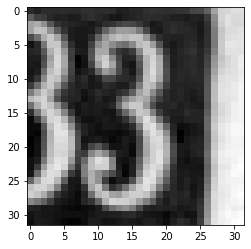

In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_train[9],cmap='gray')
plt.show()


In [9]:
y_train[9]

3

## Reshape and normalize the train and test features

In [10]:
trainX = X_train.astype('float32')
valX=X_val.astype('float32')
testX = X_test.astype('float32')
trainX /= 255
valX /= 255
testX /= 255


## Define the model architecture using TensorFlow with a flatten layer followed by dense layers with activation as ReLu and softmax

In [11]:

#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 32x32 to 1024
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))
#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [12]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(750, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))

In [13]:
#Add 2nd hidden layer
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(500, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))


In [14]:
#Add 3rd hidden layer
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))

In [15]:
#Add 3rd hidden layer
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(100, activation='relu'))


In [16]:
#Add 4th hidden layer
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(30, activation='relu'))

In [17]:
#Add OUTPUT layer

model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [18]:
adam=tf.keras.optimizers.Adam()

## Compile the model with loss as categorical cross-entropy and adam optimizers. Use accuracy as the metric for evaluation

In [19]:
#Compile the model
model.compile(optimizer=adam, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense (Dense)                (None, 750)               768750    
_________________________________________________________________
dropout (Dropout)            (None, 750)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 750)               3000      
_________________________________________________________________
dense_1 (Dense)              (None, 500)               375500    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0

In [21]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('svhn_v1.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)


In [22]:
model.fit(trainX,trainY,          
          validation_data=(valX,valY),
          epochs=200,
          batch_size=35,callbacks=[model_checkpoint])

Epoch 1/200
1198/1200 [============================>.] - ETA: 0s - loss: 1.7222 - accuracy: 0.4014
Epoch 00001: val_accuracy improved from -inf to 0.64020, saving model to svhn_v1.h5
1200/1200 [==============================] - 30s 25ms/step - loss: 1.7216 - accuracy: 0.4016 - val_loss: 1.1166 - val_accuracy: 0.6402
Epoch 2/200
1200/1200 [==============================] - ETA: 0s - loss: 1.2202 - accuracy: 0.6074
Epoch 00002: val_accuracy improved from 0.64020 to 0.72835, saving model to svhn_v1.h5
1200/1200 [==============================] - 30s 25ms/step - loss: 1.2202 - accuracy: 0.6074 - val_loss: 0.8684 - val_accuracy: 0.7283
Epoch 3/200
1199/1200 [============================>.] - ETA: 0s - loss: 1.0667 - accuracy: 0.6600
Epoch 00003: val_accuracy improved from 0.72835 to 0.75225, saving model to svhn_v1.h5
1200/1200 [==============================] - 30s 25ms/step - loss: 1.0668 - accuracy: 0.6600 - val_loss: 0.7930 - val_accuracy: 0.7523
Epoch 4/200
1198/1200 [=================

## Fit and evaluate the model. Print the loss and accuracy for the test data (10 points)


In [27]:
model.evaluate(testX,testY,verbose=1)

563/563 [==============================] - 3s 5ms/step - loss: 0.3863 - accuracy: 0.8916


[0.38626253604888916, 0.8916110992431641]